In [ ]:
import tensorflow as tf
import numpy as np
import PIL
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import os
import matplotlib.pyplot as plt
import cv2
import glob

In [ ]:
data=[]
path = "/home/nullpotential/Downloads/subdata/"
for file in os.listdir(path):
    a= cv2.imread(path+file)
    data.append(a)

In [ ]:
len(data)

47

In [ ]:
crop_data=[]
for i in range(47):
    x=tf.image.crop_to_bounding_box(data[i], 106, 0, 150, 455)
    crop_data.append(x)

2022-09-13 21:22:57.523463: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-13 21:22:57.528147: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-09-13 21:22:58.852651: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-13 21:22:58.852725: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nullpotential): /proc/driver/nvidia/version does not exist
2022-09-13 21:22:58.854445: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flag

In [ ]:
resized_data=[]
for i in crop_data:
    i=tf.image.resize(i,[66,200])
    resized_data.append(i)

In [ ]:
final_data=[]
for i in resized_data:
    final_data.append(i/255.0)

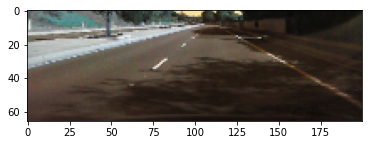

In [ ]:
plt.imshow(final_data[17])

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(66,200,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(1164,activation='relu'),
                                  tf.keras.layers.Dense(100, activation='relu'),
                                  tf.keras.layers.Dense(50,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='relu'),
                                  tf.keras.layers.Dense(1)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 198, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 23, 32)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 21, 32)         9

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),loss='mse')

In [ ]:
import os
os.getcwd()

'/home/nullpotential'

In [ ]:
os.chdir('/home/nullpotential/Downloads/')

In [ ]:
os.getcwd()

'/home/nullpotential/Downloads'

In [ ]:
y=pd.read_excel('datalabels.xlsx')

In [ ]:
y=np.array(y)

In [ ]:
X=np.array(final_data)

In [ ]:
y.shape

(47, 1)

In [ ]:
model.fit(X,y,epochs=10)

2022-09-13 21:23:19.720619: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-09-13 21:23:19.745442: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2400000000 Hz


Epoch 1/10
2/2 [==============================] - 1s 93ms/step - loss: 47.6966
Epoch 2/10
2/2 [==============================] - 0s 88ms/step - loss: 41.2974
Epoch 3/10
2/2 [==============================] - 0s 80ms/step - loss: 22.4802
Epoch 4/10
2/2 [==============================] - 0s 83ms/step - loss: 19.4253
Epoch 5/10
2/2 [==============================] - 0s 83ms/step - loss: 17.5206
Epoch 6/10
2/2 [==============================] - 0s 83ms/step - loss: 18.6600
Epoch 7/10
2/2 [==============================] - 0s 82ms/step - loss: 17.3370
Epoch 8/10
2/2 [==============================] - 0s 81ms/step - loss: 14.9377
Epoch 9/10
2/2 [==============================] - 0s 83ms/step - loss: 17.9021
Epoch 10/10
2/2 [==============================] - 0s 83ms/step - loss: 14.7484


In [ ]:
model.save('model.pb')